In [46]:
#import necessary libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.calibration import CalibratedClassifierCV

In [47]:
#import data
df = pd.read_csv('D:/Cuvette/Final Evaluation Project/Machine Learning/diabetes.csv')
# Set display format for pandas to avoid scientific notation
pd.set_option('display.float_format', '{:.2f}'.format)

In [48]:
df.shape

(768, 9)

In [49]:
df.head(20)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.60,0.63,50,1
1,1,85,66,29,0,26.60,0.35,31,0
2,8,183,64,0,0,23.30,0.67,32,1
3,1,89,66,23,94,28.10,0.17,21,0
4,0,137,40,35,168,43.10,2.29,33,1
5,5,116,74,0,0,25.60,0.20,30,0
6,3,78,50,32,88,31.00,0.25,26,1
7,10,115,0,0,0,35.30,0.13,29,0
8,2,197,70,45,543,30.50,0.16,53,1
9,8,125,96,0,0,0.00,0.23,54,1


In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [51]:
df.describe()               #basic summary statistics of numerical column

#this shows that there might be some noisy data in insulin column

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.00,768.00,768.00,768.00,768.00,768.00,768.00,768.00,768.00
mean,3.85,120.89,69.11,20.54,79.80,31.99,0.47,33.24,0.35
std,3.37,31.97,19.36,15.95,115.24,7.88,0.33,11.76,0.48
min,0.00,0.00,0.00,0.00,0.00,0.00,0.08,21.00,0.00
25%,1.00,99.00,62.00,0.00,0.00,27.30,0.24,24.00,0.00
50%,3.00,117.00,72.00,23.00,30.50,32.00,0.37,29.00,0.00
75%,6.00,140.25,80.00,32.00,127.25,36.60,0.63,41.00,1.00
max,17.00,199.00,122.00,99.00,846.00,67.10,2.42,81.00,1.00


shows histogram, boxplot and density plots for Glucose, BMI, Age

C:\Users\Yashsvi Maurya\AppData\Local\Temp\ipykernel_12524\1208444637.py:16: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df['Glucose'], ax=axes[2], shade=True, color='purple')


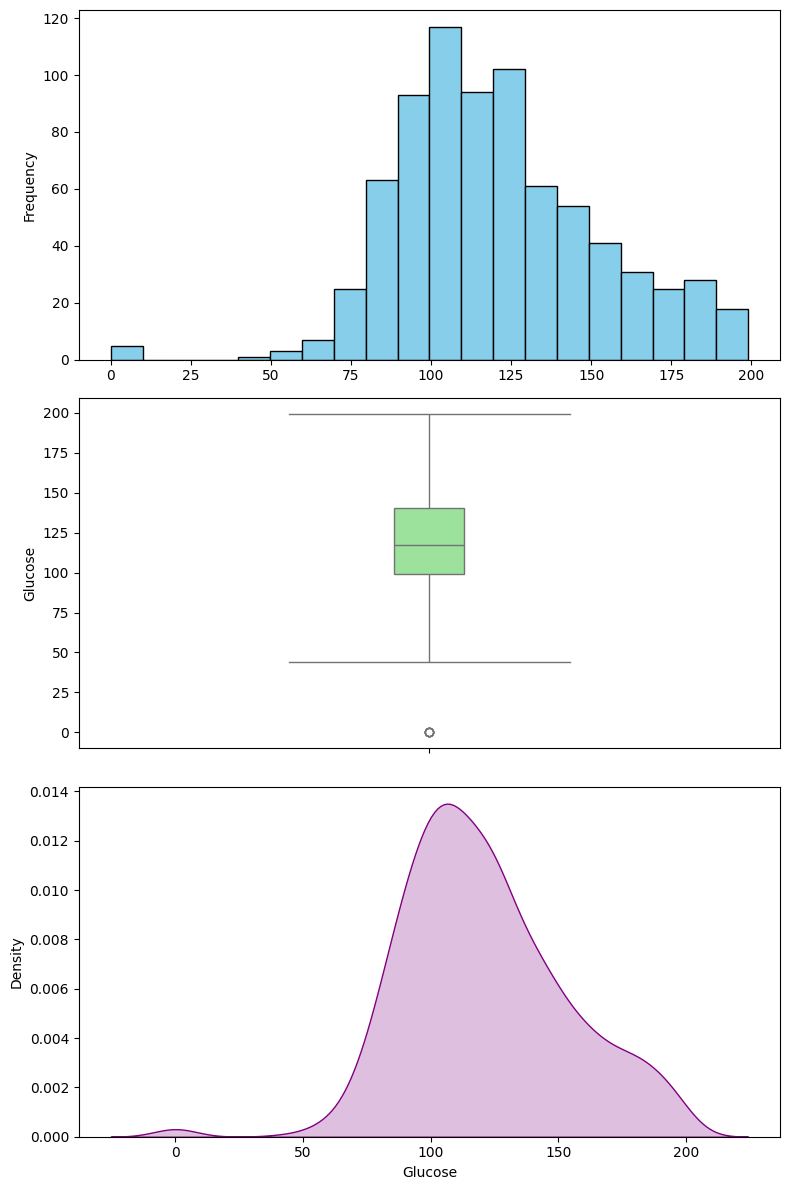

In [52]:
#Glucose

# Create a single figure with subplots
fig, axes = plt.subplots(3, 1, figsize=(8,12))

# Histogram
axes[0].hist(df['Glucose'], bins=20, color='skyblue', edgecolor='black')
axes[0].set_ylabel("Frequency")


# Boxplot
sns.boxplot(df['Glucose'], ax=axes[1], color='lightgreen', widths = 0.1)


# Density Plot
sns.kdeplot(df['Glucose'], ax=axes[2], shade=True, color='purple')

plt.tight_layout()
plt.show()

C:\Users\Yashsvi Maurya\AppData\Local\Temp\ipykernel_12524\3140785682.py:16: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df['BMI'], ax=axes[2], shade=True, color='purple')


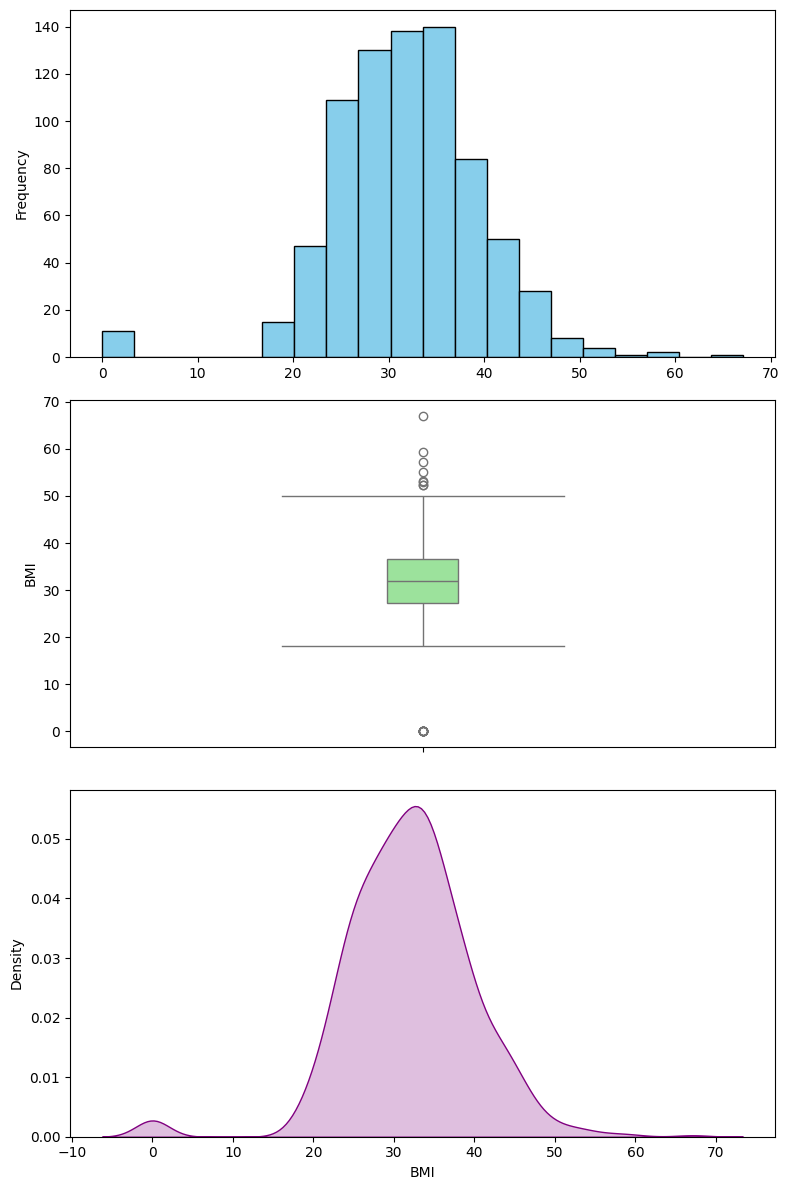

In [53]:
#BMI

# Create a single figure with subplots
fig, axes = plt.subplots(3, 1, figsize=(8,12))

# Histogram
axes[0].hist(df['BMI'], bins=20, color='skyblue', edgecolor='black')
axes[0].set_ylabel("Frequency")


# Boxplot
sns.boxplot(df['BMI'], ax=axes[1], color='lightgreen', widths = 0.1)


# Density Plot
sns.kdeplot(df['BMI'], ax=axes[2], shade=True, color='purple')

plt.tight_layout()
plt.show()

C:\Users\Yashsvi Maurya\AppData\Local\Temp\ipykernel_12524\2156696389.py:16: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df['Age'], ax=axes[2], shade=True, color='purple')


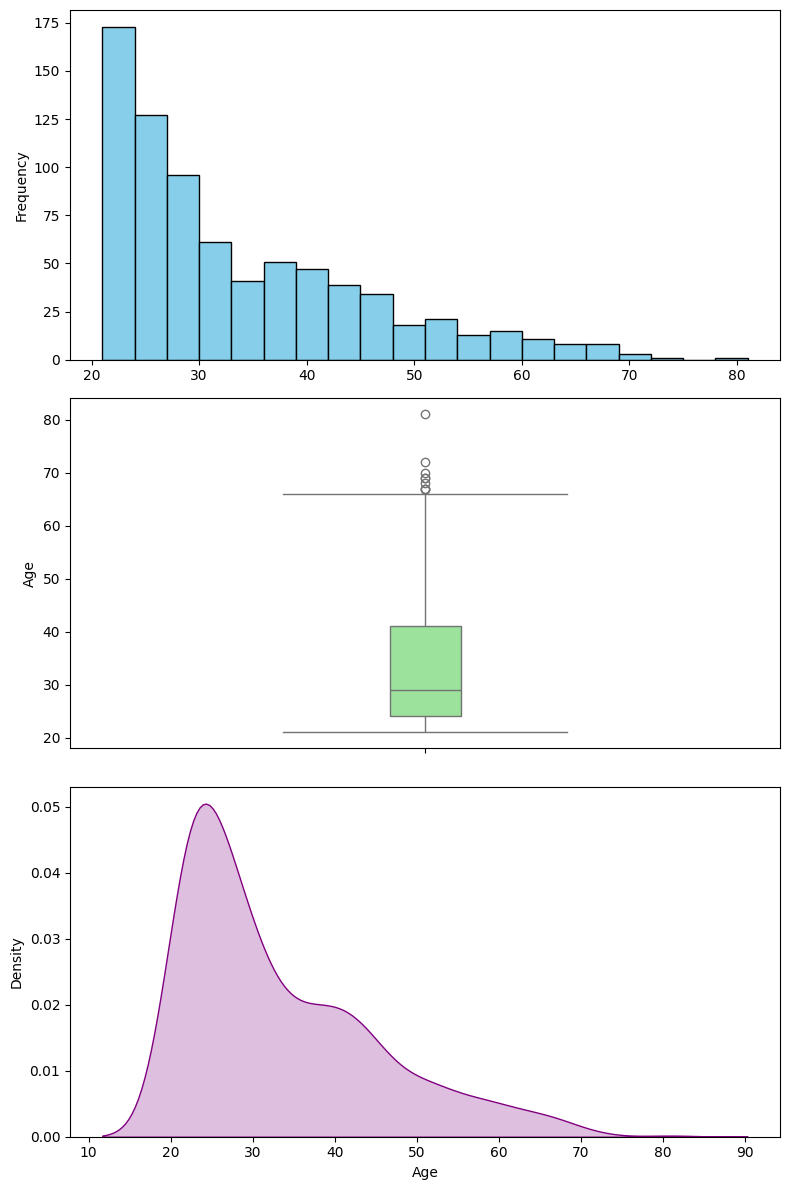

In [54]:
#Age

# Create a single figure with subplots
fig, axes = plt.subplots(3, 1, figsize=(8,12))

# Histogram
axes[0].hist(df['Age'], bins=20, color='skyblue', edgecolor='black')
axes[0].set_ylabel("Frequency")


# Boxplot
sns.boxplot(df['Age'], ax=axes[1], color='lightgreen', widths = 0.1)


# Density Plot
sns.kdeplot(df['Age'], ax=axes[2], shade=True, color='purple')

plt.tight_layout()
plt.show()

Correlation Matrix and Scatterplot to investigate relationship between features

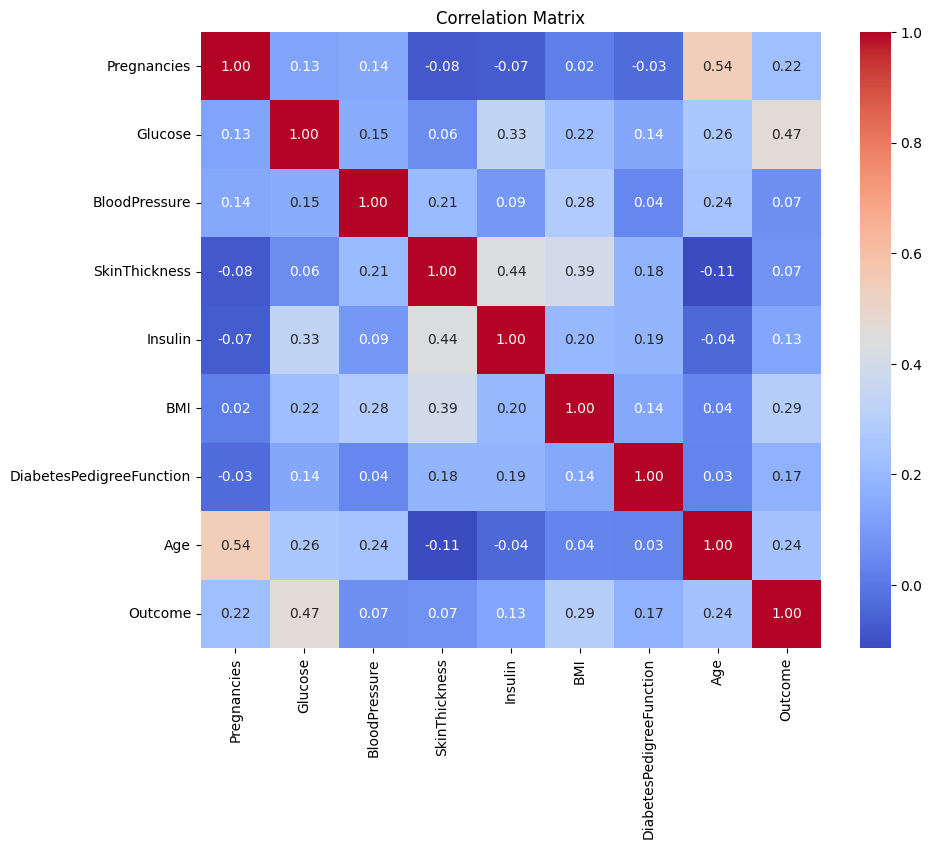

In [55]:
# Compute the correlation matrix
corr_matrix = df.corr()

# Plot the correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', cbar=True)
plt.title("Correlation Matrix")
plt.show()

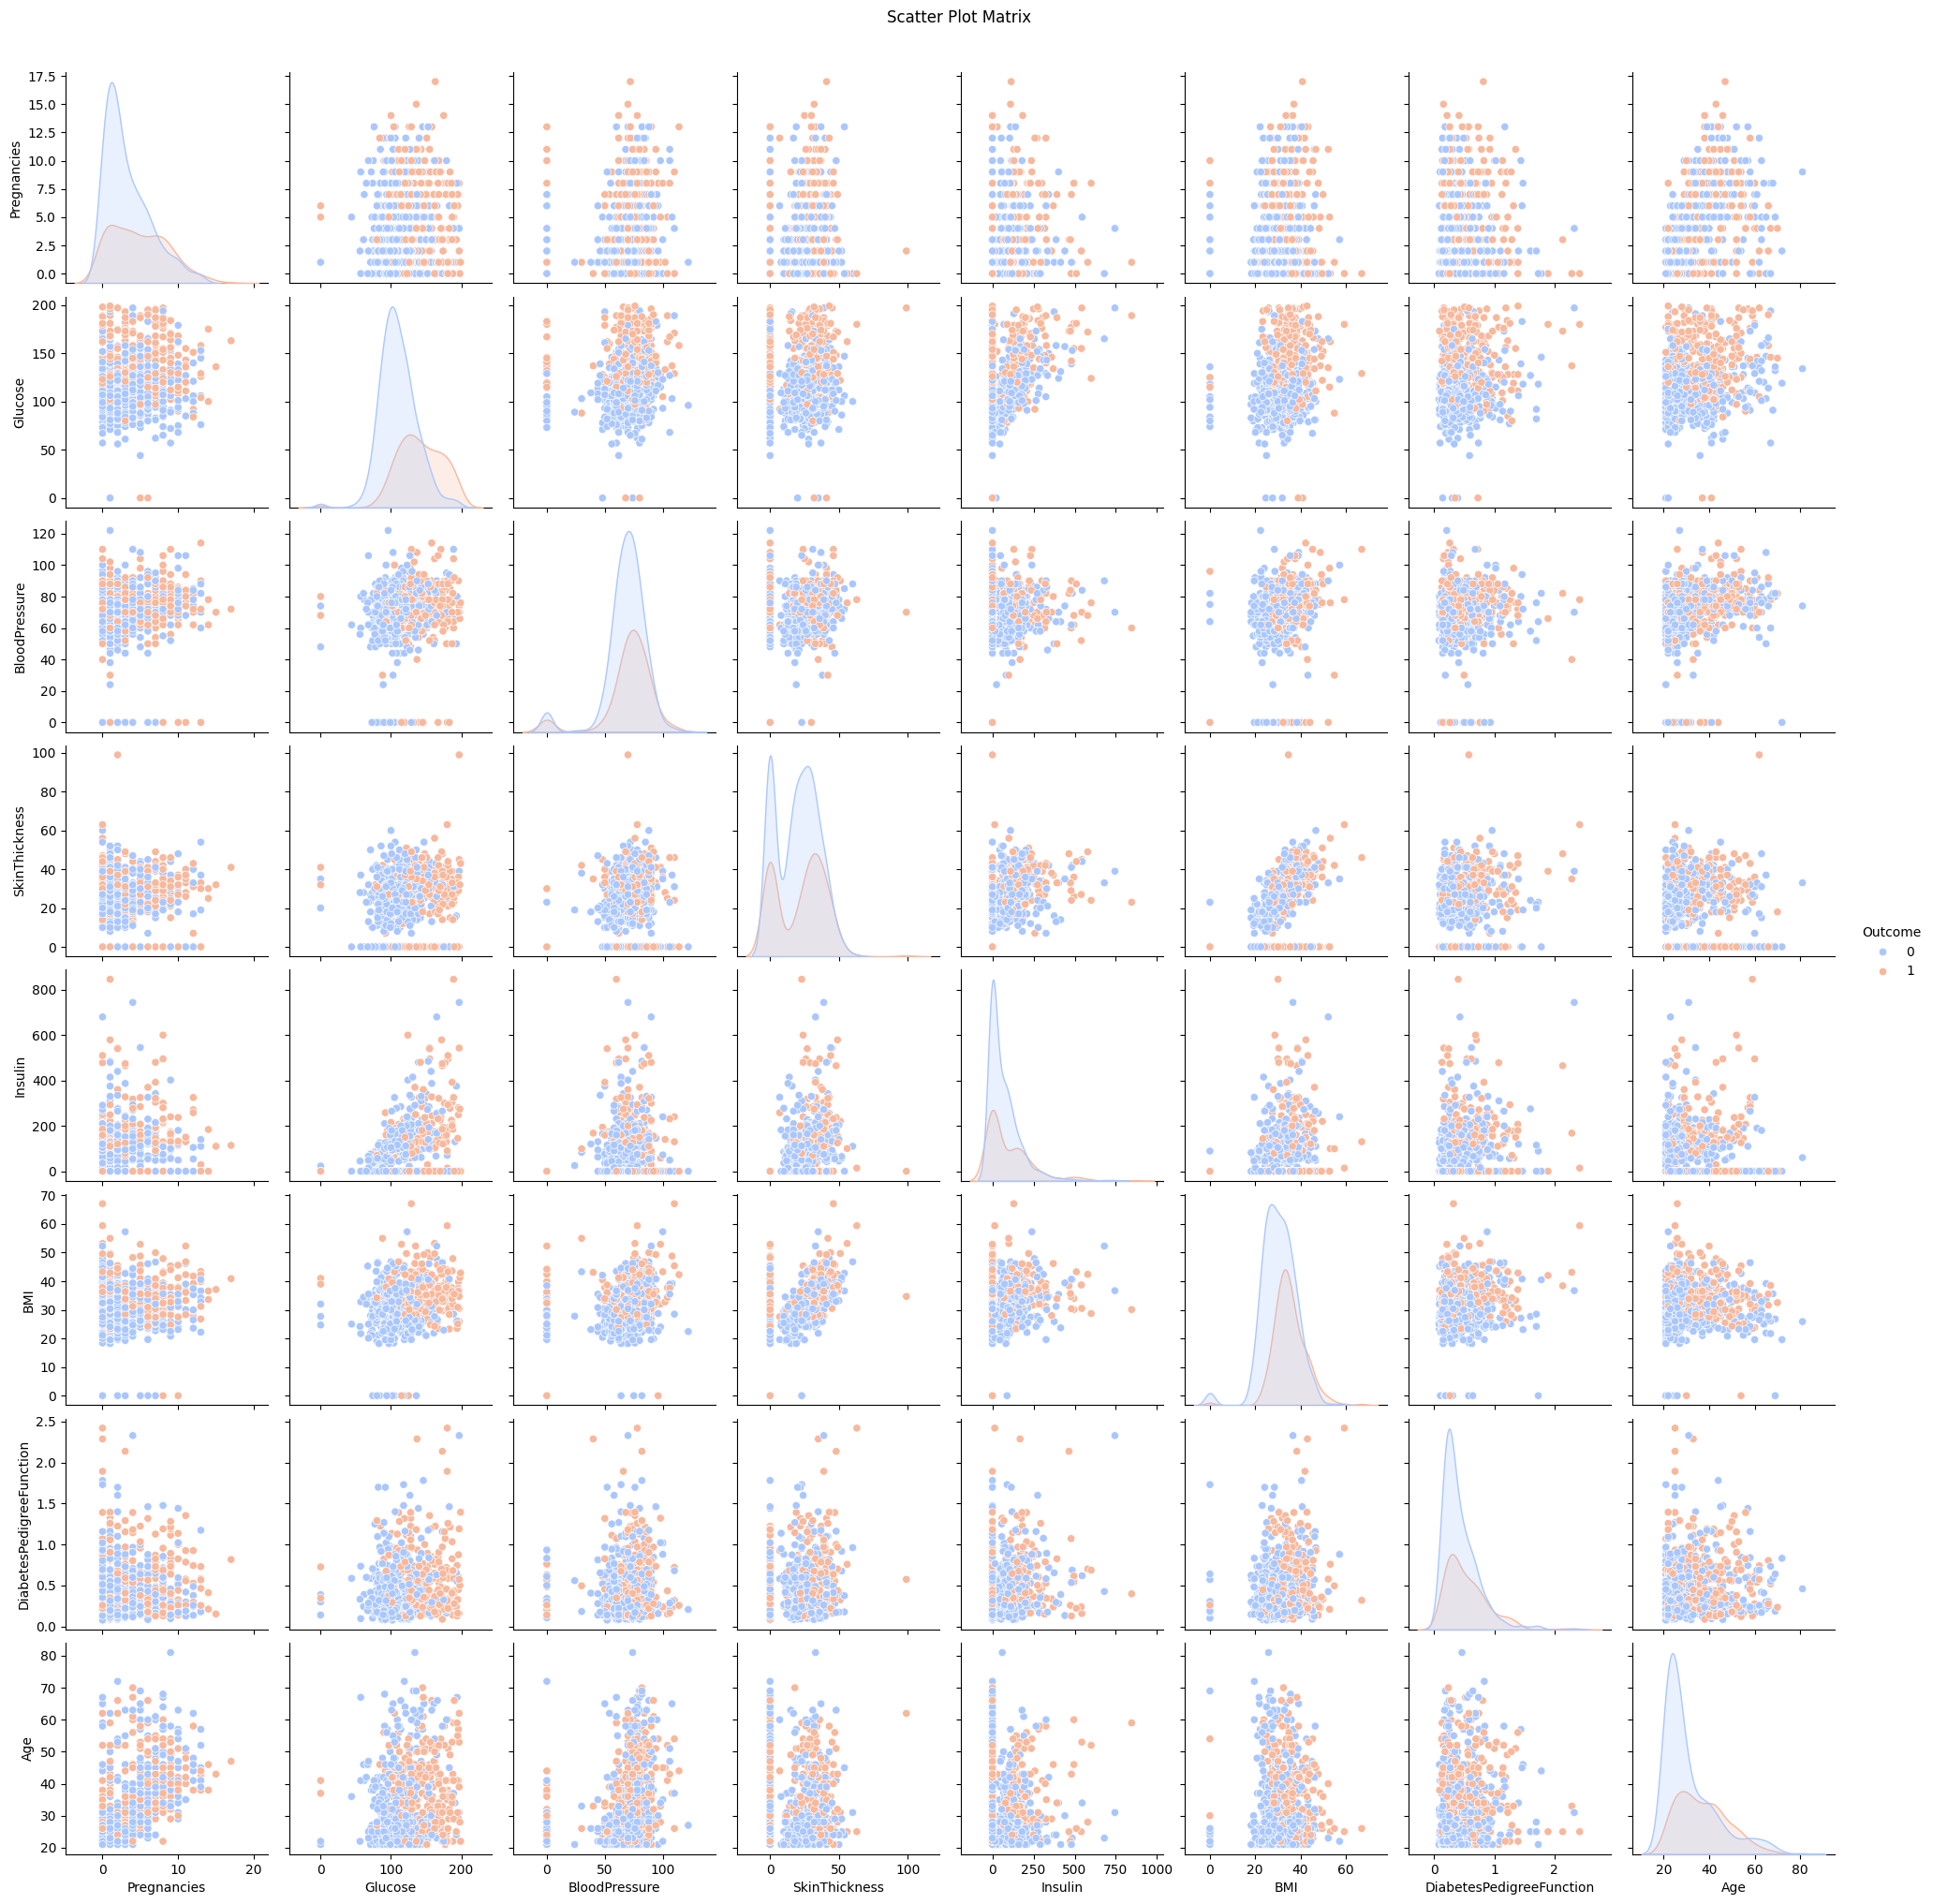

In [56]:
# Pairplot for scatter plots
sns.pairplot(df, hue='Outcome', diag_kind='kde', palette='coolwarm')
plt.suptitle("Scatter Plot Matrix", y=1.02)
plt.show()

In [57]:
#removing outliers

columns_to_impute = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
def remove_outliers(df, columns):
    for col in columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        # if lower_bound < 0:
        #     lower_bound = 0
        df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]
        print("\n",lower_bound)
        print(upper_bound)
    return df


# Apply outlier removal
df = remove_outliers(df, columns_to_impute)



 37.125
202.125

 35.0
107.0

 -49.5
82.5

 -198.0
330.0

 13.800000000000006
49.79999999999999


In [58]:
#Identifying missing values
count_missing_values = df.isnull().sum()

#Check countof zero values in critical columns
count_zero_values = (df[['Glucose', 'BMI', 'Age', 'SkinThickness', 'Insulin']]==0).sum()

print("Missing Values:\n", count_missing_values)
print("\nZero Values:\n",count_zero_values)

Missing Values:
 Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

Zero Values:
 Glucose            0
BMI                0
Age                0
SkinThickness    188
Insulin          324
dtype: int64


In [59]:
#Handling only Zero Values as there were no missing values
# Replace zero values with NaN for imputation
columns_to_impute = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
df[columns_to_impute] = df[columns_to_impute].replace(0, pd.NA)

# Impute missing values with the median
df.fillna(df.median(), inplace=True)

C:\Users\Yashsvi Maurya\AppData\Local\Temp\ipykernel_12524\3983262446.py:7: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.fillna(df.median(), inplace=True)


In [60]:
# Convert Outcome to categorical type
df['Outcome'] = df['Outcome'].astype('category')

# Verify data types
print(df.dtypes)

Pregnancies                    int64
Glucose                        int64
BloodPressure                  int64
SkinThickness                float64
Insulin                      float64
BMI                          float64
DiabetesPedigreeFunction     float64
Age                            int64
Outcome                     category
dtype: object


In [ ]:
# Create interaction term
df["Age_BMI"] = df["Age"] * df["BMI"]
df["Glucose_BMI"] = df["Glucose"] * df["BMI"]

# Drop the original Age and BMI columns (if no longer needed)
df = df.drop(["Age", "BMI", "Glucose"], axis=1)

In [62]:
df.head()

,Pregnancies,BloodPressure,SkinThickness,Insulin,DiabetesPedigreeFunction,Outcome,Age_BMI,Glucose_BMI
0,6,72,35.00,120.00,0.63,1,1680.00,4972.80
1,1,66,29.00,120.00,0.35,0,824.60,2261.00
2,8,64,29.00,120.00,0.67,1,745.60,4263.90
3,1,66,23.00,94.00,0.17,0,590.10,2500.90
4,0,40,35.00,168.00,2.29,1,1422.30,5904.70


## Feature Engineering

In [63]:
# Initialize scalers
standard_scaler = StandardScaler()

columns_to_standardize = ['BloodPressure', 'SkinThickness', 'Insulin']

# Standardization (Z-score Scaling)
standardized_features = standard_scaler.fit_transform(df[columns_to_standardize])
standardized_df = pd.DataFrame(standardized_features, columns=columns_to_standardize)

# Final dataset with standardized columns
final_df = pd.concat([df.drop(columns=columns_to_standardize), standardized_df], axis=1)

In [64]:
final_df.head()

,Pregnancies,DiabetesPedigreeFunction,Outcome,Age_BMI,Glucose_BMI,BloodPressure,SkinThickness,Insulin
0,6.00,0.63,1,1680.00,4972.80,-0.02,0.75,-0.12
1,1.00,0.35,0,824.60,2261.00,-0.54,0.03,-0.12
2,8.00,0.67,1,745.60,4263.90,-0.72,0.03,-0.12
3,1.00,0.17,0,590.10,2500.90,-0.54,-0.68,-0.61
4,0.00,2.29,1,1422.30,5904.70,-2.83,0.75,0.80


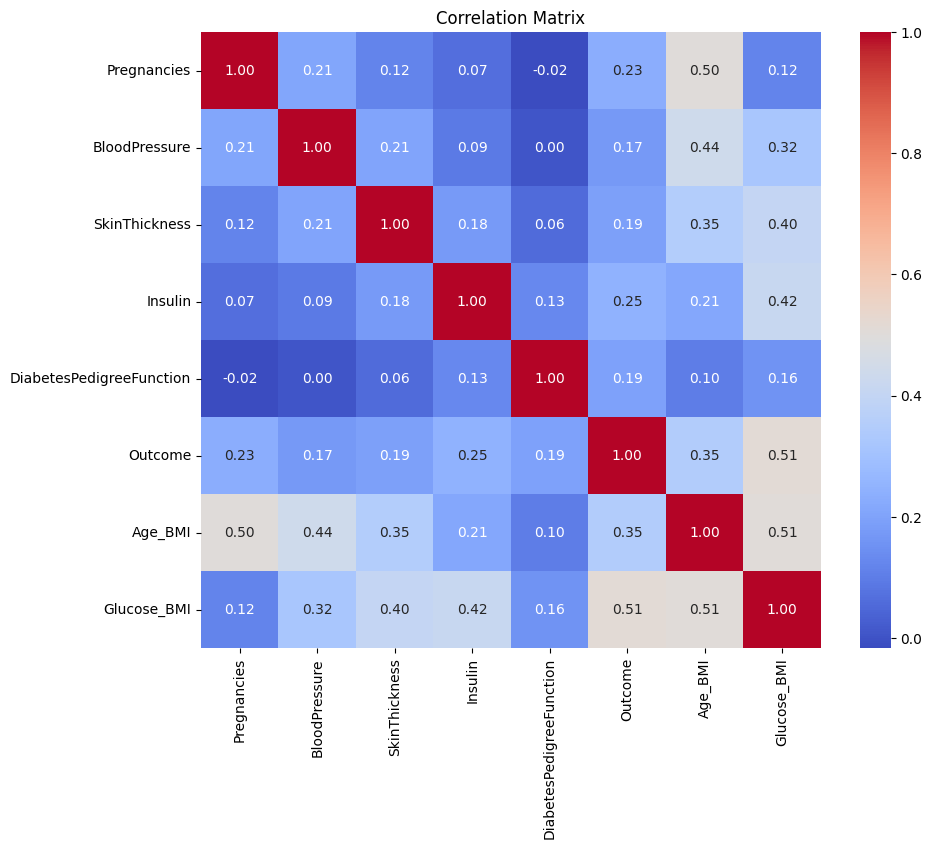

In [65]:
correlation_matrix = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

In [66]:
high_correlation = correlation_matrix[(correlation_matrix > 0.4) | (correlation_matrix < -0.4)]
print("\nHighly Correlated Features:")
print(high_correlation)


Highly Correlated Features:
                          Pregnancies  BloodPressure  SkinThickness  Insulin  \
Pregnancies                      1.00            NaN            NaN      NaN   
BloodPressure                     NaN           1.00            NaN      NaN   
SkinThickness                     NaN            NaN           1.00      NaN   
Insulin                           NaN            NaN            NaN     1.00   
DiabetesPedigreeFunction          NaN            NaN            NaN      NaN   
Outcome                           NaN            NaN            NaN      NaN   
Age_BMI                          0.50           0.44            NaN      NaN   
Glucose_BMI                       NaN            NaN           0.40     0.42   

                          DiabetesPedigreeFunction  Outcome  Age_BMI  \
Pregnancies                                    NaN      NaN     0.50   
BloodPressure                                  NaN      NaN     0.44   
SkinThickness                     

## Train-Test Split

In [67]:
y = df['Outcome']

In [68]:
x = df.drop('Outcome', axis=1)

In [69]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)

## Model Training

In [70]:
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.fit_transform(x_test)

#### Logistic Regression

In [71]:
model_log = LogisticRegression(max_iter=1000)

In [72]:
model_log.fit(x_train_scaled, y_train)

LogisticRegression(max_iter=1000)

#### Decision Tree

In [73]:
model_tree = tree.DecisionTreeClassifier(max_depth=4)

In [74]:
model_tree.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=4)

#### Random Forest

In [75]:
model_rf = RandomForestClassifier(n_estimators=1000, n_jobs = -1, random_state = 42)

In [76]:
model_rf.fit(x_train, y_train)

RandomForestClassifier(n_estimators=1000, n_jobs=-1, random_state=42)

#### Gradient Boosting Machine

In [77]:
model_gbm = GradientBoostingClassifier(n_estimators=500, learning_rate=0.1, max_depth=5)

In [78]:
model_gbm.fit(x_train, y_train)

GradientBoostingClassifier(max_depth=5, n_estimators=500)

#### Support Vector Machine

In [79]:
model_svm = SVC(kernel='linear', C=10, random_state = 42)

In [80]:
model_svm.fit(x_train_scaled, y_train)

SVC(C=10, kernel='linear', random_state=42)

In [81]:
model_xgb = XGBClassifier(n_estimators=1000, learning_rate=0.1, max_depth=5, n_jobs = -1)
model_xgb.fit(x_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=1000, n_jobs=-1,
              num_parallel_tree=None, random_state=None, ...)

## Testing Models

In [82]:
#predicting values for all models
y_predict_log = model_log.predict(x_test_scaled)
y_predict_rf = model_rf.predict(x_test)
y_predict_tree = model_tree.predict(x_test)
y_predict_gbm = model_gbm.predict(x_test)
y_predict_svm = model_svm.predict(x_test_scaled)


In [83]:
y_predict_xgb = model_xgb.predict(x_test)

In [84]:
print(accuracy_score(y_test, y_predict_xgb))
print(precision_score(y_test, y_predict_xgb))
print(recall_score(y_test, y_predict_xgb))
print(f1_score(y_test, y_predict_xgb))
print(roc_auc_score(y_test, y_predict_xgb))

0.708029197080292
0.5641025641025641
0.4888888888888889
0.5238095238095238
0.6520531400966184


In [85]:
#Logistic Regression
print(accuracy_score(y_test, y_predict_log))
print(precision_score(y_test, y_predict_log))
print(recall_score(y_test, y_predict_log))
print(f1_score(y_test, y_predict_log))
print(roc_auc_score(y_test, y_predict_log))

0.7445255474452555
0.6470588235294118
0.4888888888888889
0.5569620253164557
0.6792270531400966


In [86]:
#Random Forest
print(accuracy_score(y_test, y_predict_rf))
print(precision_score(y_test, y_predict_rf))
print(recall_score(y_test, y_predict_rf))
print(f1_score(y_test, y_predict_rf))
print(roc_auc_score(y_test, y_predict_rf))

0.7518248175182481
0.6486486486486487
0.5333333333333333
0.5853658536585366
0.6960144927536231


In [87]:
#Decision Tree
print(accuracy_score(y_test, y_predict_tree))
print(precision_score(y_test, y_predict_tree))
print(recall_score(y_test, y_predict_tree))
print(f1_score(y_test, y_predict_tree))
print(roc_auc_score(y_test, y_predict_tree))

0.6861313868613139
0.525
0.4666666666666667
0.49411764705882355
0.630072463768116


In [88]:
#Gradient Boosting Machine
print(accuracy_score(y_test, y_predict_gbm))
print(precision_score(y_test, y_predict_gbm))
print(recall_score(y_test, y_predict_gbm))
print(f1_score(y_test, y_predict_gbm))
print(roc_auc_score(y_test, y_predict_gbm))

0.6934306569343066
0.5405405405405406
0.4444444444444444
0.4878048780487805
0.6298309178743962


In [89]:
#Support Vector Machine
print(accuracy_score(y_test, y_predict_svm))
print(precision_score(y_test, y_predict_svm))
print(recall_score(y_test, y_predict_svm))
print(f1_score(y_test, y_predict_svm))
print(roc_auc_score(y_test, y_predict_svm))

0.7445255474452555
0.65625
0.4666666666666667
0.5454545454545454
0.6735507246376812


## Cross Validation

In [90]:
# Define Stratified K-Fold cross-validator
kfold = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)

# Perform k-fold cross-validation for Random Forest
rf_scores = cross_val_score(model_rf, x, y, cv=kfold, scoring='accuracy')
print(f"Random Forest:\nMean Accuracy: {rf_scores.mean():.2f} | Std: {rf_scores.std():.2f}")

# Perform k-fold cross-validation for Logistic Regression
lr_scores = cross_val_score(model_log, x_scaled, y, cv=kfold, scoring='accuracy')
print(f"\nLogistic Regression:\nMean Accuracy: {lr_scores.mean():.2f} | Std: {lr_scores.std():.2f}")

# Perform k-fold cross-validation for Decision Tree
dt_scores = cross_val_score(model_tree, x, y, cv=kfold, scoring='accuracy')
print(f"\nDecision Tree:\nMean Accuracy: {dt_scores.mean():.2f} | Std: {dt_scores.std():.2f}")

# Perform k-fold cross-validation for GBM
gbm_scores = cross_val_score(model_gbm, x, y, cv=kfold, scoring='accuracy')
print(f"\nGradient Boosting Machines (GBM):\nMean Accuracy: {gbm_scores.mean():.2f} | Std: {gbm_scores.std():.2f}")

# Perform k-fold cross-validation for SVM
svm_scores = cross_val_score(model_svm, x_scaled, y, cv=kfold, scoring='accuracy')
print(f"\nSupport Vector Machines (SVM):\nMean Accuracy: {svm_scores.mean():.2f} | Std: {svm_scores.std():.2f}")

Random Forest:
Mean Accuracy: 0.75 | Std: 0.01

Logistic Regression:
Mean Accuracy: 0.77 | Std: 0.01

Decision Tree:
Mean Accuracy: 0.72 | Std: 0.00

Gradient Boosting Machines (GBM):
Mean Accuracy: 0.73 | Std: 0.01

Support Vector Machines (SVM):
Mean Accuracy: 0.78 | Std: 0.01


In [91]:
kfold = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)
xgb_scores = cross_val_score(model_xgb, x, y, cv=kfold, scoring='accuracy')
print(f"\nXGBoost:\nMean Accuracy: {xgb_scores.mean():.2f} | Std: {xgb_scores.std():.2f}")


XGBoost:
Mean Accuracy: 0.73 | Std: 0.02


# Hyperparameter Tuning

In [92]:
# Logistic Regression hyperparameters
log_param_grid = {
    'C': [0.01, 0.1, 1, 10],
    'solver': ['liblinear'],
    'max_iter': [1000, 1500],
    'penalty': ['l1']
}

# Logistic Regression GridSearch
log_reg_grid = GridSearchCV(estimator=model_log, param_grid=log_param_grid, cv=5)
log_reg_grid.fit(x_train_scaled, y_train)
print(f"Best Logistic Regression parameters: {log_reg_grid.best_params_}")
print(f"Best Logistic Regression score: {log_reg_grid.best_score_}")

Best Logistic Regression parameters: {'C': 0.1, 'max_iter': 1000, 'penalty': 'l1', 'solver': 'liblinear'}
Best Logistic Regression score: 0.7941556235134217


In [93]:
#best model after tuning
best_log = log_reg_grid.best_estimator_

In [94]:
# Decision Tree hyperparameters
dt_param_grid = {
    'max_depth': [5, 10, 15, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [6, 8, 10],
    'criterion': ['gini', 'entropy']
}

# Decision Tree GridSearch
dt_grid = GridSearchCV(estimator=model_tree, param_grid=dt_param_grid, cv=5)
dt_grid.fit(x_train, y_train)
print(f"Best Decision Tree parameters: {dt_grid.best_params_}")
print(f"Best Decision Tree score: {dt_grid.best_score_}")

Best Decision Tree parameters: {'criterion': 'entropy', 'max_depth': 5, 'min_samples_leaf': 8, 'min_samples_split': 2}
Best Decision Tree score: 0.7335202174651717


In [95]:
#best model after tuning
best_tree = dt_grid.best_estimator_

In [96]:
# Random Forest hyperparameters
rf_param_grid = {
    'n_estimators': [1000, 1100,1200],
    'max_depth': [5, 10, 15, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [6, 8, 10],
    'max_features': [None, 'sqrt', 'log2']
}

# Random Forest GridSearch
rf_grid = GridSearchCV(estimator=model_rf, param_grid=rf_param_grid, cv=5)
rf_grid.fit(x_train, y_train)
print(f"Best Random Forest parameters: {rf_grid.best_params_}")
print(f"Best Random Forest score: {rf_grid.best_score_}")

Best Random Forest parameters: {'max_depth': 5, 'max_features': None, 'min_samples_leaf': 6, 'min_samples_split': 2, 'n_estimators': 1000}
Best Random Forest score: 0.7757560312606184


In [97]:
#best model after tuning
best_rf = rf_grid.best_estimator_

In [98]:
# Gradient Boosting hyperparameters
gb_param_grid = {
    'n_estimators': [300,500,700],
    'learning_rate': [0.01, 0.1, 0.5],
    'max_depth': [3, 5, 7],
    'min_samples_split': [2, 5, 10],
    'subsample': [0.5, 0.7,1.0]
}

# Gradient Boosting GridSearch
gb_grid = GridSearchCV(estimator=model_gbm, param_grid=gb_param_grid, cv=5)
gb_grid.fit(x_train, y_train)
print(f"Best Gradient Boosting parameters: {gb_grid.best_params_}")
print(f"Best Gradient Boosting score: {gb_grid.best_score_}")

Best Gradient Boosting parameters: {'learning_rate': 0.01, 'max_depth': 3, 'min_samples_split': 2, 'n_estimators': 500, 'subsample': 0.5}
Best Gradient Boosting score: 0.7830784913353721


In [99]:
#best model after tuning
best_gbm = gb_grid.best_estimator_

In [100]:
# SVM hyperparameters
svm_param_grid = {
    'C': [0.01, 0.1, 1, 10],
    'kernel': ['linear', 'rbf', 'poly'],
    'degree': [2, 3, 4],
    'gamma': ['scale', 'auto']
}

# SVM GridSearch
svm_grid = GridSearchCV(estimator=model_svm, param_grid=svm_param_grid, cv=5)
svm_grid.fit(x_train_scaled, y_train)
print(f"Best SVM parameters: {svm_grid.best_params_}")
print(f"Best SVM score: {svm_grid.best_score_}")

Best SVM parameters: {'C': 1, 'degree': 2, 'gamma': 'scale', 'kernel': 'linear'}
Best SVM score: 0.794138634046891


In [101]:
#best model after tuning
best_svm = svm_grid.best_estimator_

### Train and Test the best models after hyperparamter tuning

In [104]:
y_predict_log_2 = best_log.predict(x_test_scaled)
y_predict_rf_2 = best_rf.predict(x_test)
y_predict_tree_2 = best_tree.predict(x_test)
y_predict_gbm_2 = best_gbm.predict(x_test)
y_predict_svm_2 = best_svm.predict(x_test_scaled)

In [105]:
print(accuracy_score(y_test, y_predict_log_2))
print(precision_score(y_test, y_predict_log_2))
print(recall_score(y_test, y_predict_log_2))
print(f1_score(y_test, y_predict_log_2))
print(roc_auc_score(y_test, y_predict_log_2))

0.7299270072992701
0.6176470588235294
0.4666666666666667
0.5316455696202531
0.6626811594202899


In [106]:
print(accuracy_score(y_test, y_predict_rf_2))
print(precision_score(y_test, y_predict_rf_2))
print(recall_score(y_test, y_predict_rf_2))
print(f1_score(y_test, y_predict_rf_2))
print(roc_auc_score(y_test, y_predict_rf_2))

0.6934306569343066
0.5454545454545454
0.4
0.46153846153846156
0.6184782608695651


In [107]:
print(accuracy_score(y_test, y_predict_tree_2))
print(precision_score(y_test, y_predict_tree_2))
print(recall_score(y_test, y_predict_tree_2))
print(f1_score(y_test, y_predict_tree_2))
print(roc_auc_score(y_test, y_predict_tree_2))

0.7299270072992701
0.6052631578947368
0.5111111111111111
0.5542168674698795
0.6740338164251207


In [108]:
print(accuracy_score(y_test, y_predict_gbm_2))
print(precision_score(y_test, y_predict_gbm_2))
print(recall_score(y_test, y_predict_gbm_2))
print(f1_score(y_test, y_predict_gbm_2))
print(roc_auc_score(y_test, y_predict_gbm_2))

0.7372262773722628
0.6216216216216216
0.5111111111111111
0.5609756097560976
0.6794685990338164


In [109]:
print(accuracy_score(y_test, y_predict_svm_2))
print(precision_score(y_test, y_predict_svm_2))
print(recall_score(y_test, y_predict_svm_2))
print(f1_score(y_test, y_predict_svm_2))
print(roc_auc_score(y_test, y_predict_svm_2))

0.7445255474452555
0.65625
0.4666666666666667
0.5454545454545454
0.6735507246376812


### Since the values of evaluation metrics for Random Forest Classifier are better than the values of all other classifiers used(Logistic Regression, Decision Tree, Gradient Boosting Machine, Support Vector Machine), so we will move forward with the Random Forest model for further analysis and detailed results.

In [110]:
# Apply Platt Scaling (sigmoid-based) to calibrate the model
calibrated_model = CalibratedClassifierCV(best_rf, method="isotonic")
calibrated_model.fit(x_train, y_train)

# Get new calibrated probabilities
y_prob = calibrated_model.predict_proba(x_test)[:, 1]

optimal_threshold = 0.4
y_predict_rf_2 = (y_prob > optimal_threshold).astype(int)

In [111]:
#classification report
print(classification_report(y_test, y_predict_rf_2))


              precision    recall  f1-score   support

           0       0.86      0.80      0.83        92
           1       0.65      0.73      0.69        45

    accuracy                           0.78       137
   macro avg       0.75      0.77      0.76       137
weighted avg       0.79      0.78      0.78       137



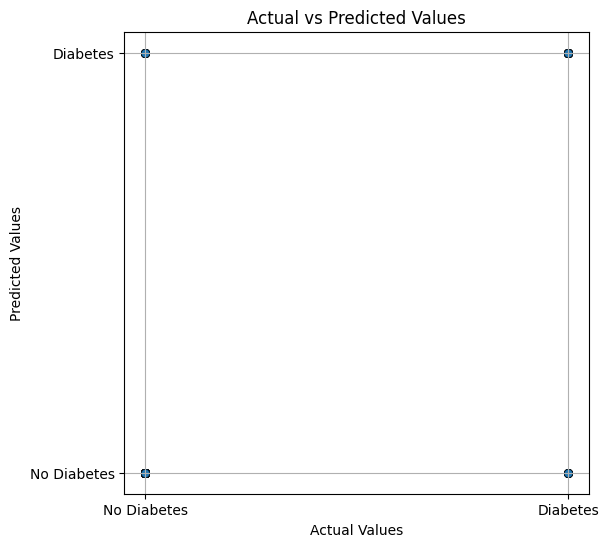

In [112]:
#scatter plot to compare actual values with predicted values.
plt.figure(figsize=(6, 6))
sns.scatterplot(x=y_test, y=y_predict_rf_2, alpha=0.6, edgecolor="black")

# Add labels and title
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs Predicted Values")
plt.xticks([0, 1], ["No Diabetes", "Diabetes"])
plt.yticks([0, 1], ["No Diabetes", "Diabetes"])
plt.grid(True)

# Show plot
plt.show()

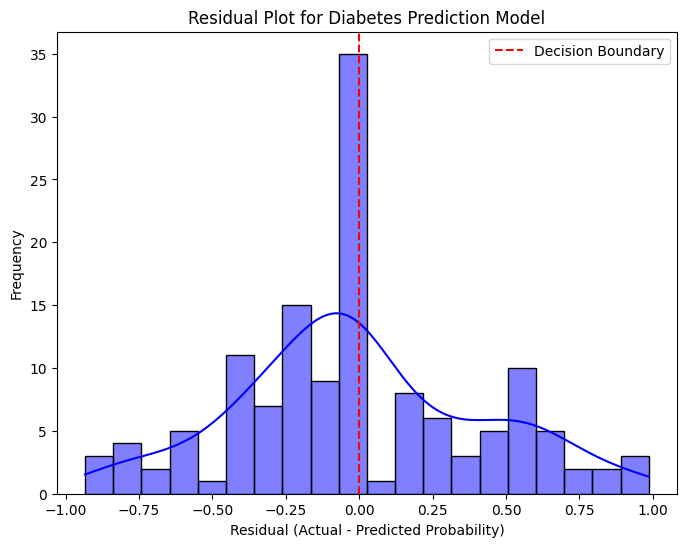

In [113]:
#Residual Plot

# Convert categorical target to numeric
y_test = y_test.astype(float)  

# Compute Residuals
residuals = y_test - y_prob
 

# Plot Residuals
plt.figure(figsize=(8, 6))
sns.histplot(residuals, bins=20, kde=True, color='blue')
plt.axvline(x=0, color='red', linestyle='--', label="Decision Boundary")
plt.xlabel("Residual (Actual - Predicted Probability)")
plt.ylabel("Frequency")
plt.title("Residual Plot for Diabetes Prediction Model")
plt.legend()
plt.show()

In [114]:
#final values of the evaluation metrics
print(accuracy_score(y_test, y_predict_rf_2))
print(precision_score(y_test, y_predict_rf_2))
print(recall_score(y_test, y_predict_rf_2))
print(f1_score(y_test, y_predict_rf_2))
print(roc_auc_score(y_test, y_predict_rf_2))

0.781021897810219
0.6470588235294118
0.7333333333333333
0.6875
0.768840579710145


In [115]:
#classification report
print("Classification Report (Threshold = 0.4):")
print(classification_report(y_test, y_predict_rf_2))


Classification Report (Threshold = 0.4):
              precision    recall  f1-score   support

         0.0       0.86      0.80      0.83        92
         1.0       0.65      0.73      0.69        45

    accuracy                           0.78       137
   macro avg       0.75      0.77      0.76       137
weighted avg       0.79      0.78      0.78       137

